In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

**Ok, lets import our pickle data from our last module**

In [2]:
os.getcwd()
one_level_up = os.path.dirname(os.getcwd())
df = pd.read_pickle(one_level_up + '\\data\\processed\\09122020_tweets_vectorize_wCommon.pkl')
df.head()


,politican,Party,TS,sentiment_score,10,10 hero,10 hero never,10 pump,10 pump 15,10 senator,...,youre see youre,youve,youve never,youve never seen,zuckerberg,zuckerberg billionaire,zuckerberg billionaire outrageous,zuckerbergs,zuckerbergs wealth,zuckerbergs wealth surpass
0,Lisa Murkowski,R,9.79,0.7650,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Lisa Murkowski,R,8.44,0.4215,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Lisa Murkowski,R,10.98,0.8316,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Lisa Murkowski,R,9.63,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Lisa Murkowski,R,10.16,0.6705,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**now we will make the leaders list/Dataframe and convert the party to D = 0 and R = 1**

In [3]:
dem_leaders = ['Joe Biden', 'Bernard Sanders','Kamala D. Harris', 'Elizabeth Warren']
rep_leaders = ['Mitch McConnell','Mike Pence','Donald Trump','Ted Cruz' ]

leaders = dem_leaders +rep_leaders
leaders

['Joe Biden',
 'Bernard Sanders',
 'Kamala D. Harris',
 'Elizabeth Warren',
 'Mitch McConnell',
 'Mike Pence',
 'Donald Trump',
 'Ted Cruz']

In [4]:
df_leaders = df[df['politican'].isin(leaders) == True]
party_code  = {'R':1, 'D':0}

df_nonleaders = df[df['politican'].isin(leaders) == False]
df_nonleaders['Party'] = df_nonleaders['Party'].replace(party_code)


df_leaders['Party'] = df_leaders['Party'].replace(party_code)
df_leaders

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,politican,Party,TS,sentiment_score,10,10 hero,10 hero never,10 pump,10 pump 15,10 senator,...,youre see youre,youve,youve never,youve never seen,zuckerberg,zuckerberg billionaire,zuckerberg billionaire outrageous,zuckerbergs,zuckerbergs wealth,zuckerbergs wealth surpass
1507,Kamala D. Harris,0,5.55,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1508,Kamala D. Harris,0,9.09,-0.4588,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1509,Kamala D. Harris,0,7.60,-0.8591,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1510,Kamala D. Harris,0,6.50,-0.4767,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1511,Kamala D. Harris,0,6.34,-0.6249,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,Joe Biden,0,6.78,0.5859,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17120,Joe Biden,0,6.99,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17121,Joe Biden,0,7.98,-0.6280,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17122,Joe Biden,0,8.18,-0.2500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**OK there are a lot of vector here. Lets see if we can do a PCA and make the feature dimension smaller so it doesn't take a bit toll on ou
** there are a lot of vectors here. Let's see if we can do a PCA and make the feature dimension smaller, so it doesn't take a bit toll on our machine**
	
**I tried it, and it doesn’t make any difference.  Therefore, I have decided not to use any PCA**

In [5]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 30)
# pca.fit_transform(df.iloc[:,4:])

In [6]:
# ###  ok in general dimension reduction is not very helpful when it comes to text generations
# plt.plot(range(0,30),pca.explained_variance_, marker ='.')
# plt.plot(range(0,30),np.cumsum(pca.explained_variance_), marker ='.')
# plt.title('Principle Component of the TFIDF Vector')
# plt.xlabel('Principle Component')
# #plt.xticks(np.arange(0,20))

**We will split the leader politican tweet to train and test set**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report


X = df_leaders.drop(['politican','Party'], axis = 1)
y = df_leaders.Party

X_train, X_test, y_train, y_test = train_test_split(X,y , train_size = 0.75, test_size = 0.25)

## Scaling of the Vector
**Applying a standard scaler so all of our feature are in the same scale**

In [8]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

**We will try a simple model first.  Support vector machine (SVM) seems like a good idea!**

In [9]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
evaluation_score = []
for c in np.arange(0.4,1,0.1):
    svc_model = SVC(C = c)
    svc_model.fit(X_train, y_train)
    evaluation_score.append(svc_model.score(X_train, y_train)) #0.814 for LinearSVC 0.808 with scaler
    y_pred = svc_model.predict(X_test)
    evaluation_score.append(accuracy_score(y_test, y_pred)) #0.700 for LinearSVC 0.66 with scaler
    print(classification_report(y_test, y_pred))


C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.61      1.00      0.76       182
           1       0.00      0.00      0.00       116

    accuracy                           0.61       298
   macro avg       0.31      0.50      0.38       298
weighted avg       0.37      0.61      0.46       298



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.61      1.00      0.76       182
           1       0.00      0.00      0.00       116

    accuracy                           0.61       298
   macro avg       0.31      0.50      0.38       298
weighted avg       0.37      0.61      0.46       298

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       182
           1       1.00      0.16      0.28       116

    accuracy                           0.67       298
   macro avg       0.83      0.58      0.54       298
weighted avg       0.79      0.67      0.59       298

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       182
           1       0.69      0.46      0.55       116

    accuracy                           0.71       298
   macro avg       0.70      0.66      0.67       298
weighted avg       0.70      0.71      0.69       298

              preci

**SVC in general can not get accuacy over 50 percents.  This is probably not a good model to deal with NLP.  Since the model isn't very good.  We will not apply to the Senator Data**

In [10]:
print(evaluation_score)
print(confusion_matrix(y_test, y_pred)) 

[0.5722284434490481, 0.610738255033557, 0.574468085106383, 0.610738255033557, 0.6786114221724524, 0.674496644295302, 0.9832026875699889, 0.7080536912751678, 0.9977603583426652, 0.5973154362416108, 0.9977603583426652, 0.4697986577181208]
[[ 52 130]
 [ 28  88]]


## Random Forest Classifer
**Now, lets try a more complicated model.  Random Forest Classifier with random search cross-validation.  Since I already ran it.  I would generally say the more detailed the tree, the better**

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy.stats as stats

#param_grid = {'n_estimators':np.arange(10,220,50), 'criterion':['gini','entropy'], 'min_samples_leaf': np.arange(1,6,2)
#             , 'max_depth': np.arange(10,220, 5)}

start = time.time()

param_grid = {'n_estimators':stats.randint(100,400), 'criterion':['entropy']
              , 'min_samples_leaf':stats.randint(1,6), 'max_depth': stats.randint(100,400)}

RF_model = RandomForestClassifier()
RF_model_cv = RandomizedSearchCV(RF_model, param_grid, cv = 5, n_iter = 60, n_jobs = 4, scoring = 'accuracy')
RF_model_cv.fit(X_train, y_train)
y_pred = RF_model_cv.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(RF_model_cv.best_estimator_)
print(accuracy_score(y_test, y_pred)) 

end = time.time()
print('The amount of time required for training RF Model is:', end - start)

#RandomForestClassifier(criterion='entropy', max_depth=307, n_estimators=250)


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       182
           1       0.94      0.87      0.91       116

    accuracy                           0.93       298
   macro avg       0.93      0.92      0.92       298
weighted avg       0.93      0.93      0.93       298

[[176   6]
 [ 15 101]]
RandomForestClassifier(criterion='entropy', max_depth=185, n_estimators=150)
0.9295302013422819
The amount of time required for training RF Model is: 655.6569929122925


**The Accuracy is about 94 percents.  In addition, the classifcation report are all generally around 90 percent or higher.  We will use this as one of our model**

In [12]:
start = time.time()
RF_model = RandomForestClassifier(criterion='entropy', max_depth=307, n_estimators=250).fit(X_train, y_train)
end = time.time()
print('The amount of time required for training RF Model is:', end - start)


The amount of time required for training RF Model is: 6.77266526222229


## Applying RF model onto other Senators
**Since the model is so good, we will now classifier the tweets of other senator using this model**

In [13]:
#y_test.value_counts()

In [14]:
X_nonleader = df_nonleaders.drop(['politican','Party'],axis =1)
X_nonleader =  scaler.transform(X_nonleader)
                                 
y_pred = RF_model_cv.predict(X_nonleader)
result_df = df_nonleaders[['politican','Party']]
result_df['pred'] = y_pred

party_code_rev  = {1:'R', 0:'D'}


result_df['pred'] = result_df['pred'].replace(party_code_rev)
result_df['Party'] = result_df['Party'].replace(party_code_rev)

result_df['value'] = 1
result_df.groupby(['politican', 'Party','pred']).sum() 
#result_df.groupby(['politican', 'Party','pred']).sum().to_excel(one_level_up + '\\data\\09122020_RFeval_final_wCommon.xls')

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

value
politican          Party pred       
Amy Klobuchar      D     D        67
                         R        86
Angus S. King, Jr. I     D       114
                         R        80
Ben Sasse          R     D        72
...                              ...
Todd Young         R     R        92
Tom Cotton         R     D        82
                         R        92
Tom Udall          D     D       120
                         R        63

[190 rows x 1 columns]

**Once we have the dataframe, we will aggregate them together according to their name and graph each person by the amount their of tweets that are republican leaning and democrats leaning**

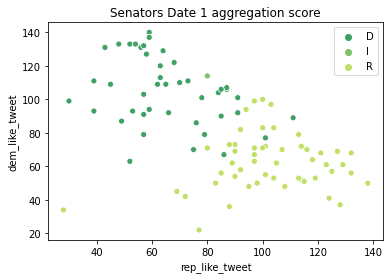

In [15]:
RF_result_df = result_df.groupby(['politican', 'Party','pred']).sum().reset_index()
rep_tweet = RF_result_df[RF_result_df['pred'] == 'R'].value
dem_tweet = RF_result_df[RF_result_df['pred'] == 'D'].value
party = RF_result_df[RF_result_df['pred'] == 'D'].Party
name = RF_result_df[RF_result_df['pred'] == 'D'].politican
result_df_1 = pd.DataFrame(zip(name,party, rep_tweet, dem_tweet), columns=['politican', 'Party','rep_like_tweet','dem_like_tweet'])
sns.scatterplot(x='rep_like_tweet', y = 'dem_like_tweet', data = result_df_1, hue = result_df_1.Party.tolist(), 
                palette= 'summer')

plt.title('Senators Date 1 aggregation score')
plt.savefig(one_level_up + '\\report_graph\\agg_score_date1')


**The aggregation score shows a clear separation between the two party and we have some outliers.  Now, we will see if AdaBoost work equally as well**
## Adaboost Classifier

In [16]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy.stats as stats

#param_grid = {'n_estimators':np.arange(10,220,50), 'criterion':['gini','entropy'], 'min_samples_leaf': np.arange(1,6,2)
#             , 'max_depth': np.arange(10,220, 5)}


#param_grid = {'n_estimators':stats.randint(500,1500), 'learning_rate': [0.001,0.01,1]
#              }
start = time.time()

AdaB_model = AdaBoostClassifier(n_estimators = 1000)
#AdaB_model_cv = RandomizedSearchCV(AdaB_model, param_grid, cv = 3, n_iter = 10, n_jobs = 4, scoring = 'recall')
AdaB_model.fit(X_train, y_train)
y_pred = AdaB_model.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#print(AdaB_model.best_estimator_)
print(accuracy_score(y_test, y_pred)) 

end =  time.time()
print('The amount of time required for training Adaboost Model is:', end - start)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       182
           1       0.91      0.96      0.93       116

    accuracy                           0.95       298
   macro avg       0.94      0.95      0.94       298
weighted avg       0.95      0.95      0.95       298

[[171  11]
 [  5 111]]
0.9463087248322147
The amount of time required for training Adaboost Model is: 238.3910150527954


**For Adaboost with cross-validation (Which takes forever compared to the RF Classifier, the general value is 0.96 percent for all of the classifcation report value.  I am going to drop it and get an AdaBoost classifier with n estimate of 1000)**

In [17]:
X_nonleader = df_nonleaders.drop(['politican','Party'],axis =1)
X_nonleader =  scaler.transform(X_nonleader)
                                 
y_pred = AdaB_model.predict(X_nonleader)
result_df = df_nonleaders[['politican','Party']]
result_df['pred'] = y_pred

party_code_rev  = {1:'R', 0:'D'}


result_df['pred'] = result_df['pred'].replace(party_code_rev)
result_df['Party'] = result_df['Party'].replace(party_code_rev)

result_df['value'] = 1
result_df.groupby(['politican', 'Party','pred']).sum() 
#result_df.groupby(['politican', 'Party','pred']).sum().to_excel(one_level_up + '\\data\\09122020_AdaBeval_final_wCommon.xls')

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

value
politican          Party pred       
Amy Klobuchar      D     D        83
                         R        70
Angus S. King, Jr. I     D       129
                         R        65
Ben Sasse          R     D       104
...                              ...
Todd Young         R     R        67
Tom Cotton         R     D        77
                         R        97
Tom Udall          D     D       141
                         R        42

[190 rows x 1 columns]

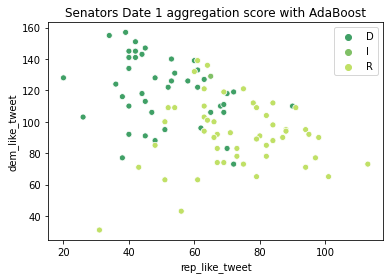

In [18]:
RF_result_df = result_df.groupby(['politican', 'Party','pred']).sum().reset_index()
rep_tweet = RF_result_df[RF_result_df['pred'] == 'R'].value
dem_tweet = RF_result_df[RF_result_df['pred'] == 'D'].value
party = RF_result_df[RF_result_df['pred'] == 'D'].Party
name = RF_result_df[RF_result_df['pred'] == 'D'].politican
result_df_1 = pd.DataFrame(zip(name,party, rep_tweet, dem_tweet), columns=['politican', 'Party','rep_like_tweet','dem_like_tweet'])
sns.scatterplot(x='rep_like_tweet', y = 'dem_like_tweet', data = result_df_1, hue = result_df_1.Party.tolist(), 
                palette= 'summer')
plt.title('Senators Date 1 aggregation score with AdaBoost')
plt.savefig(one_level_up + '\\report_graph\\AdaB_agg_score_date1')


## Handling Data From another date

In [19]:
date2_df  = pd.read_pickle(one_level_up + '\\data\\processed\\09222020_tweets_vectorize_wCommon.pkl')
date2_df['Party'] = date2_df['Party'].replace(party_code)

party_code  = {'R':1, 'D':0}

date2_df_leaders = date2_df[date2_df['politican'].isin(leaders) == True]
date2_df_nonleaders = df[df['politican'].isin(leaders) == False]

date2_df_leaders


,politican,Party,TS,sentiment_score,10,10 hero,10 hero never,10 pump,10 pump 15,10 senator,...,youre see youre,youve,youve never,youve never seen,zuckerberg,zuckerberg billionaire,zuckerberg billionaire outrageous,zuckerbergs,zuckerbergs wealth,zuckerbergs wealth surpass
16895,Mike Pence,1,9.0,0.6249,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16896,Mike Pence,1,11.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16897,Mike Pence,1,10.0,0.8807,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16898,Mike Pence,1,14.0,0.4404,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16899,Mike Pence,1,14.0,0.4404,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17257,Joe Biden,0,9.0,0.8225,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17258,Joe Biden,0,8.0,-0.2960,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17259,Joe Biden,0,10.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17260,Joe Biden,0,12.0,0.5994,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X = date2_df_leaders.drop(['politican','Party'], axis = 1)
y = date2_df_leaders.Party
X = scaler.transform(X)
y_pred = RF_model_cv.predict(X)

print(classification_report(y.tolist(), y_pred))
print(confusion_matrix(y.tolist(), y_pred))



              precision    recall  f1-score   support

           0       0.79      0.84      0.82       191
           1       0.82      0.76      0.79       176

    accuracy                           0.80       367
   macro avg       0.81      0.80      0.80       367
weighted avg       0.80      0.80      0.80       367

[[161  30]
 [ 42 134]]


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

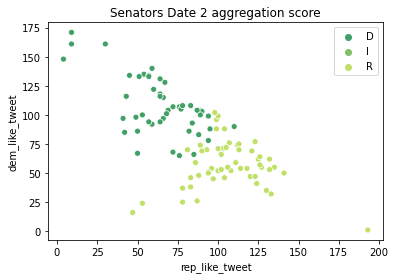

In [21]:
X = date2_df.drop(['politican','Party'], axis = 1)
y = date2_df.Party.tolist()
X = scaler.transform(X)

y_pred = RF_model_cv.predict(X)
date2_result_df = date2_df[['politican','Party']]
date2_result_df['pred'] = y_pred
date2_result_df['pred'] = date2_result_df['pred'].replace(party_code_rev)
date2_result_df['Party'] = date2_result_df['Party'].replace(party_code_rev)

date2_result_df['value'] = 1


date2_RF_result_df = date2_result_df.groupby(['politican', 'Party','pred']).sum().reset_index()

rep_tweet = date2_RF_result_df[date2_RF_result_df['pred'] == 'R'].value
dem_tweet = date2_RF_result_df[date2_RF_result_df['pred'] == 'D'].value
party = date2_RF_result_df[date2_RF_result_df['pred'] == 'D'].Party
name  = date2_RF_result_df[date2_RF_result_df['pred'] == 'D'].politican
date2_RF_result_df = pd.DataFrame(zip(name,party, rep_tweet, dem_tweet), columns=['politican', 'Party','rep_like_tweet','dem_like_tweet'])


sns.scatterplot(x='rep_like_tweet', y = 'dem_like_tweet', data = date2_RF_result_df, hue = date2_RF_result_df.Party.tolist(), 
                palette= 'summer')
plt.title('Senators Date 2 aggregation score')
plt.savefig(one_level_up + '\\report_graph\\agg_score_date2')


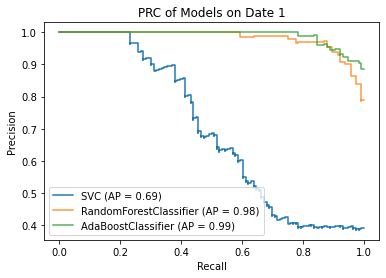

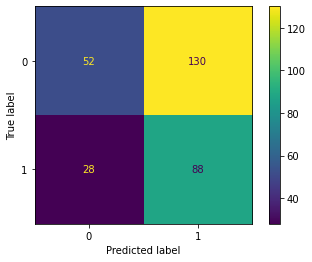

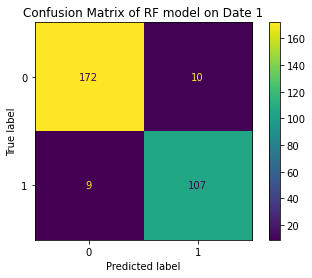

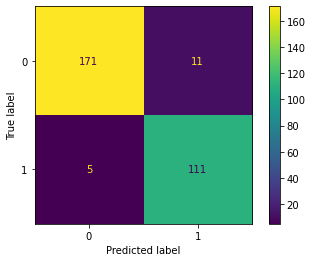

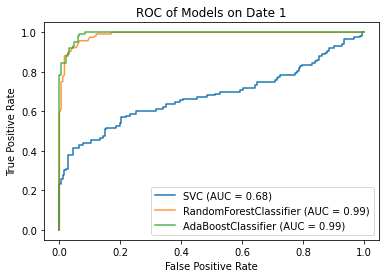

In [22]:
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix, plot_roc_curve
plot_precision_recall_curve(svc_model, X_test, y_test)
ax = plt.gca()

plot_precision_recall_curve(RF_model, X_test, y_test, ax = ax, alpha = 0.8)
plot_precision_recall_curve(AdaB_model, X_test, y_test, ax = ax, alpha = 0.8)
plt.title('PRC of Models on Date 1')
plt.savefig(one_level_up + '\\report_graph\\PRC_date1')
plt.show()

plot_confusion_matrix(svc_model, X_test, y_test)
plot_confusion_matrix(RF_model, X_test, y_test)
plt.title('Confusion Matrix of RF model on Date 1')
plt.savefig(one_level_up + '\\report_graph\\RF_CM_date1')
plt.show()

plot_confusion_matrix(AdaB_model, X_test, y_test)


ROC = plot_roc_curve(svc_model, X_test, y_test)
ax = plt.gca()
ROC = plot_roc_curve(RF_model, X_test, y_test, ax = ax, alpha = 0.8)
ROC = plot_roc_curve(AdaB_model, X_test, y_test, ax = ax, alpha = 0.8)
plt.title('ROC of Models on Date 1')
plt.savefig(one_level_up + '\\report_graph\\ROC_date1')
plt.show()



## Model Evaluation using date 2 data

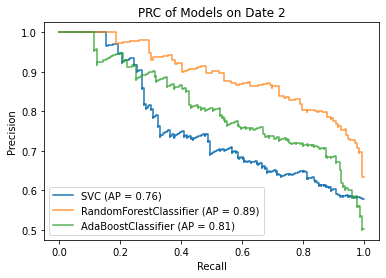

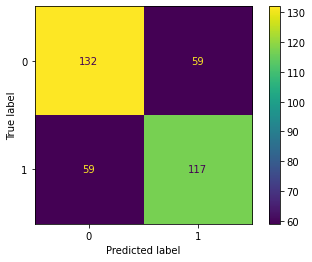

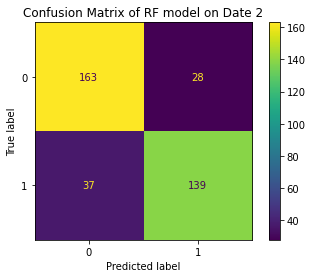

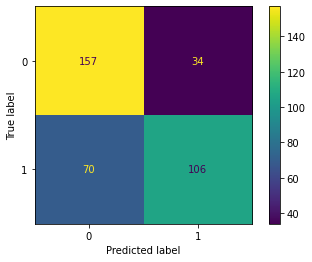

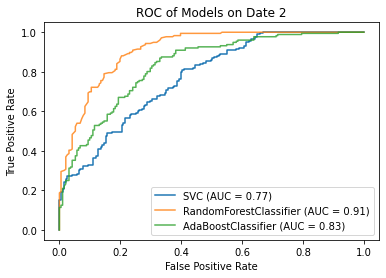

In [25]:
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix, plot_roc_curve

date2_X = date2_df_leaders.drop(['politican','Party'], axis = 1)
date2_y = date2_df_leaders.Party.to_list()
date2_X = scaler.transform(date2_X)
date2_y_pred = RF_model_cv.predict(date2_X)


PRC = plot_precision_recall_curve(svc_model, date2_X, date2_y)
ax = plt.gca()
PRC = plot_precision_recall_curve(RF_model, date2_X, date2_y, ax = ax, alpha = 0.8)
PRC = plot_precision_recall_curve(AdaB_model, date2_X, date2_y, ax = ax, alpha = 0.8)
plt.title('PRC of Models on Date 2')
plt.savefig(one_level_up + '\\report_graph\\PRC_date2')
plt.show()

plot_confusion_matrix(svc_model, date2_X, date2_y)
plot_confusion_matrix(RF_model, date2_X, date2_y)
plt.title('Confusion Matrix of RF model on Date 2')
plt.savefig(one_level_up + '\\report_graph\\RF_CM_date2')
plt.show()
plot_confusion_matrix(AdaB_model, date2_X, date2_y)


ROC = plot_roc_curve(svc_model, date2_X, date2_y)
ax = plt.gca()
ROC = plot_roc_curve(RF_model, date2_X, date2_y, ax = ax, alpha = 0.8)
ROC = plot_roc_curve(AdaB_model, date2_X, date2_y, ax = ax, alpha = 0.8)
plt.title('ROC of Models on Date 2')
plt.savefig(one_level_up + '\\report_graph\\ROC_date2')
plt.show()